# 1. Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset

In [2]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 3. Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Observation:**  
- `total_bedrooms` has 207 null values, which is approximately 1% of the data. So, we can just drop them.

In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


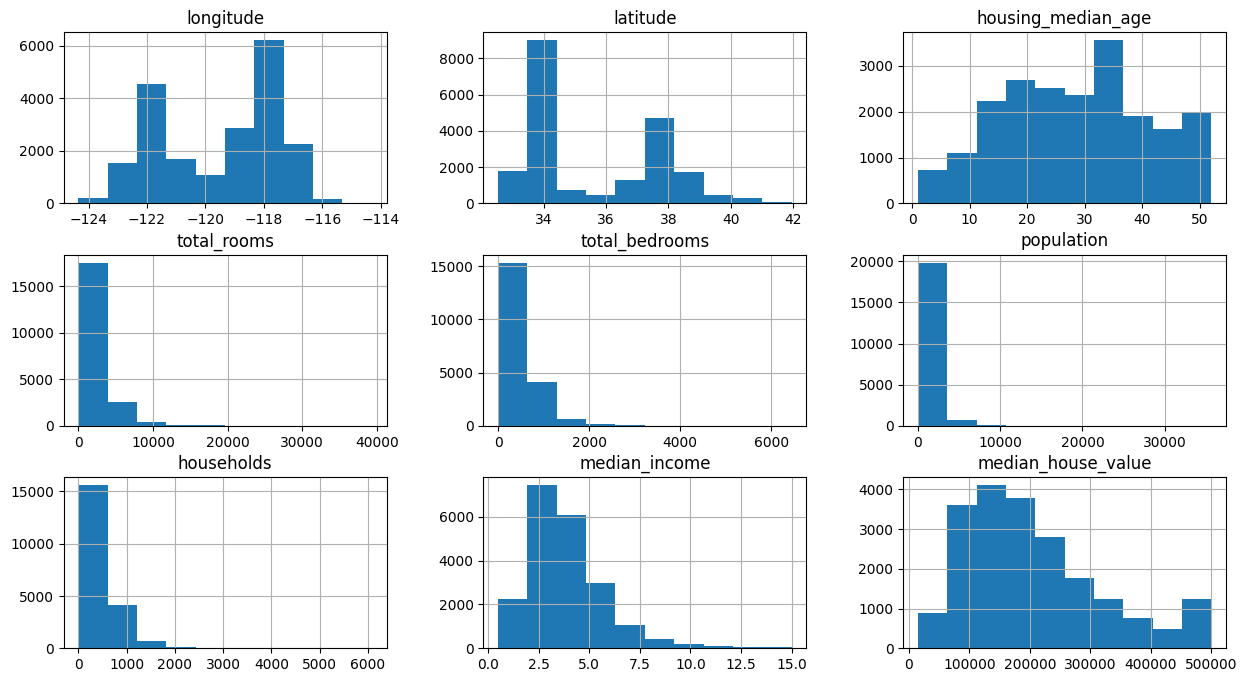

In [5]:
data.hist(figsize=(15,8))
data.dropna(inplace=True)

**Observation:**  
- Most histograms are right screwed

<Axes: >

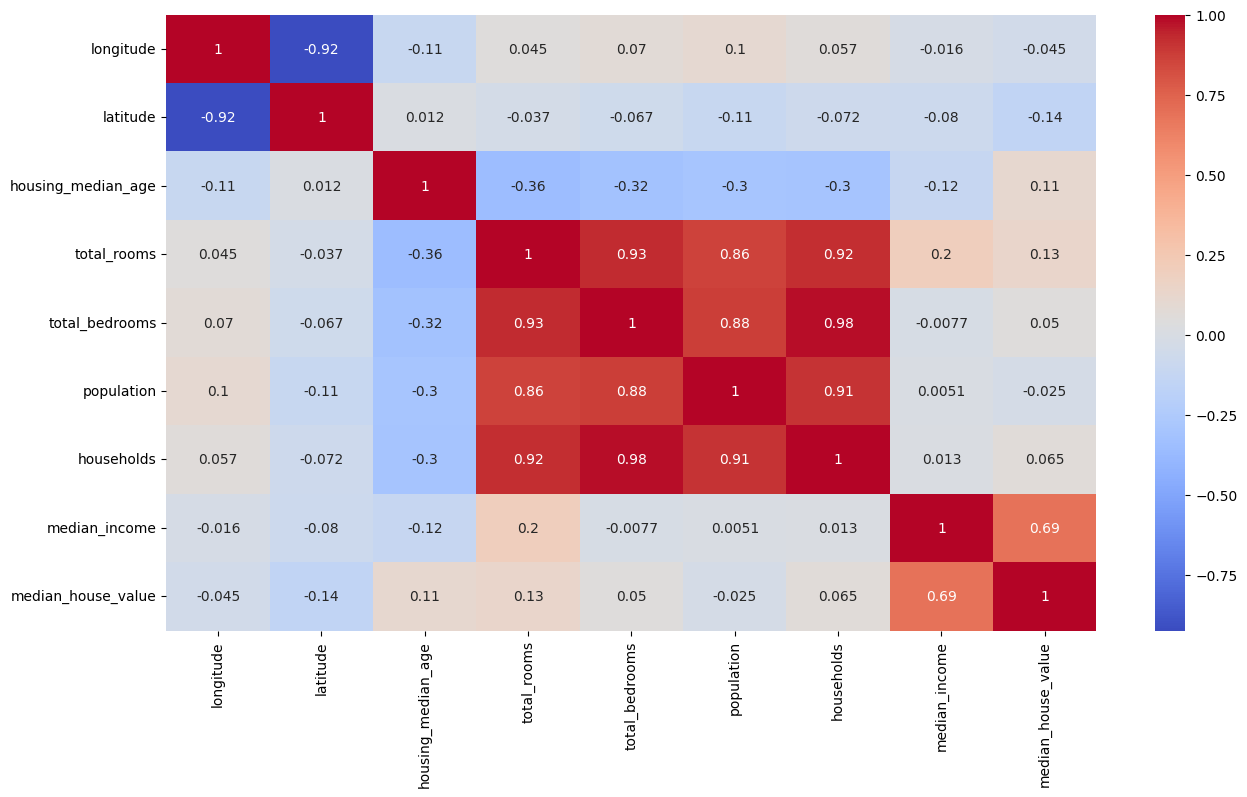

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm')

**Observation:**  
- `median_income` and the target `median_house_value` have a strong correlation.

# 4. Data Preprocessing

In [7]:
# Train Test Validation split
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

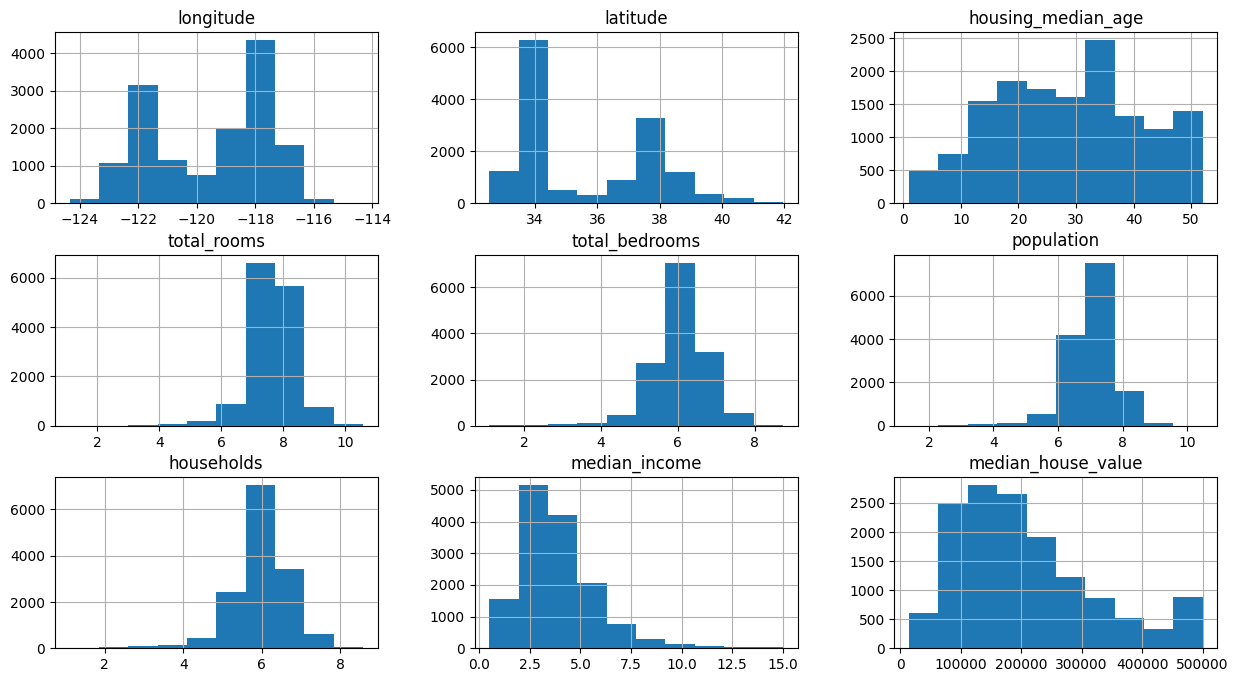

In [8]:
train_data = X_train.join(y_train)

# log normal tranformation for the right sckewed columns
train_data['total_rooms'] = np.log1p(train_data['total_rooms'])
train_data['total_bedrooms'] = np.log1p(train_data['total_bedrooms'])
train_data['population'] = np.log1p(train_data['population'])
train_data['households'] = np.log1p(train_data['households'])

train_data.hist(figsize=(15,8))

In [9]:
train_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     6386
INLAND        4489
NEAR OCEAN    1820
NEAR BAY      1604
ISLAND           4
Name: count, dtype: int64

In [10]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity']).astype(int))

train_data = train_data.drop('ocean_proximity', axis=1)

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18857,-122.27,41.20,52.0,8.414939,6.893656,7.563720,6.704414,1.5923,56000.0,0,1,0,0,0
16281,-121.28,37.94,40.0,7.939872,6.530878,7.727094,6.455199,1.8814,57700.0,0,1,0,0,0
7498,-118.25,33.92,46.0,6.584791,5.043425,6.021023,5.111988,2.0893,96500.0,1,0,0,0,0
7468,-118.20,33.92,42.0,7.252762,5.752573,7.267525,5.777652,3.0871,138800.0,1,0,0,0,0
16052,-122.48,37.76,50.0,7.712891,6.184149,7.066467,6.148468,4.0977,322100.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7930,-118.08,33.84,25.0,8.215277,6.860664,7.947325,6.758095,3.3438,153300.0,1,0,0,0,0
13768,-117.07,34.05,14.0,8.659560,6.914731,7.537430,6.735780,1.9694,173200.0,0,1,0,0,0
2203,-119.85,36.82,9.0,8.293049,6.658011,7.433667,6.569481,3.3239,91300.0,0,1,0,0,0
17785,-121.84,37.37,28.0,7.365180,5.828946,7.133296,5.869297,4.1615,214800.0,1,0,0,0,0


<Axes: >

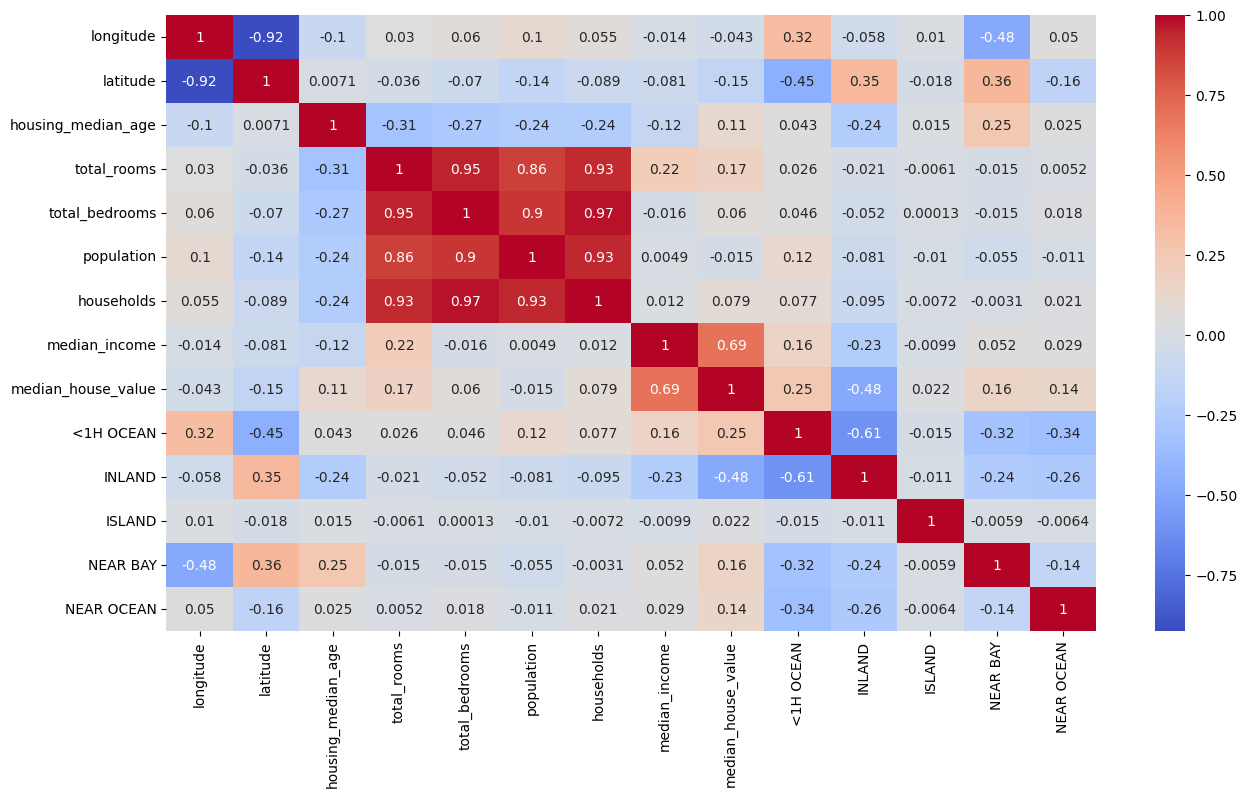

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='coolwarm')

**Observation:**  
- Now we can see that `<1H Ocean` has high correlation and `inland` has negative correlation with `median_house_value`

<Axes: xlabel='latitude', ylabel='longitude'>

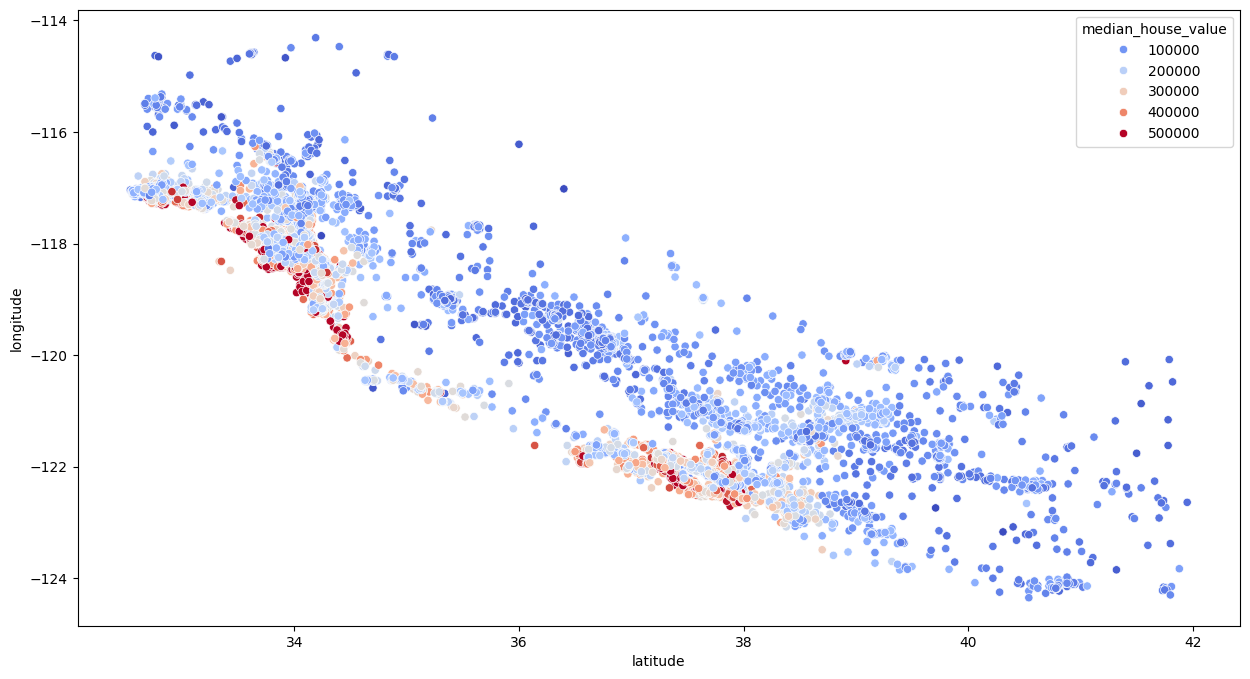

In [12]:
# Since we have the latitue and longitude lets visualize the the speadout
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue = 'median_house_value', palette='coolwarm')

# 5.1 Feature Engineering

In [13]:
train_data['rooms_per_household'] = np.log1p(train_data['total_rooms']/train_data['households'])
train_data['bedroom_ratio'] = np.log1p(train_data['total_bedrooms']/train_data['total_rooms'])

In [14]:
train_data = train_data.drop("ISLAND", axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedroom_ratio
18857,-122.27,41.20,52.0,8.414939,6.893656,7.563720,6.704414,1.5923,56000.0,0,1,0,0,0.813209,0.598406
16281,-121.28,37.94,40.0,7.939872,6.530878,7.727094,6.455199,1.8814,57700.0,0,1,0,0,0.802000,0.600232
7498,-118.25,33.92,46.0,6.584791,5.043425,6.021023,5.111988,2.0893,96500.0,1,0,0,0,0.827725,0.568672
7468,-118.20,33.92,42.0,7.252762,5.752573,7.267525,5.777652,3.0871,138800.0,1,0,0,0,0.813289,0.583977
16052,-122.48,37.76,50.0,7.712891,6.184149,7.066467,6.148468,4.0977,322100.0,0,0,1,0,0.812902,0.588783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7930,-118.08,33.84,25.0,8.215277,6.860664,7.947325,6.758095,3.3438,153300.0,1,0,0,0,0.795532,0.607105
13768,-117.07,34.05,14.0,8.659560,6.914731,7.537430,6.735780,1.9694,173200.0,0,1,0,0,0.826631,0.586958
2203,-119.85,36.82,9.0,8.293049,6.658011,7.433667,6.569481,3.3239,91300.0,0,1,0,0,0.816408,0.589365
17785,-121.84,37.37,28.0,7.365180,5.828946,7.133296,5.869297,4.1615,214800.0,1,0,0,0,0.813090,0.583008


# 6. Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



# Split the train data again
X_train = train_data.drop(['median_house_value'], axis = 1)
y_train = train_data['median_house_value']

X_train = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [16]:
test_data = X_test.join(y_test)

In [17]:
from preprocessing import preprocessing

test_data = preprocessing(test_data)

test_data = test_data.drop("ISLAND", axis=1)

test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedroom_ratio
19720,-121.83,39.10,42.0,7.156956,5.293305,6.113682,5.075174,3.2917,97900.0,0,1,0,0,1.410189,0.739603
12668,-121.44,38.48,12.0,8.503094,6.918695,7.871693,6.769642,2.7262,109800.0,0,1,0,0,1.256063,0.813668
15753,-122.45,37.77,52.0,7.739359,6.234411,6.946976,6.159095,4.1417,500000.0,0,0,1,0,1.256574,0.805546
6308,-118.01,34.05,37.0,6.526495,5.153292,6.701960,5.159055,3.8125,138000.0,1,0,0,0,1.265056,0.789596
3883,-118.52,34.22,35.0,7.390799,5.609472,6.959399,5.517453,5.5209,203300.0,1,0,0,0,1.339531,0.758980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6153,-117.97,34.09,31.0,7.930206,6.461468,7.723120,6.508769,3.4032,143400.0,0,1,0,0,1.218388,0.814792
1308,-121.83,37.99,18.0,7.916443,6.109248,7.318540,6.133398,4.7566,142500.0,0,1,0,0,1.290711,0.771716
2771,-115.90,33.34,19.0,7.099202,5.517453,5.799093,5.049856,1.7857,62800.0,0,1,0,0,1.405823,0.777193
11598,-118.07,33.79,34.0,7.813592,5.950643,6.875232,5.869297,5.8283,362400.0,1,0,0,0,1.331265,0.761576


In [18]:
# Split the test data again
X_test = test_data.drop(['median_house_value'], axis = 1)
y_test = test_data['median_house_value']


X_test = scaler.transform(X_test)

In [19]:
reg.score(X_test, y_test)

-0.9438260725548877

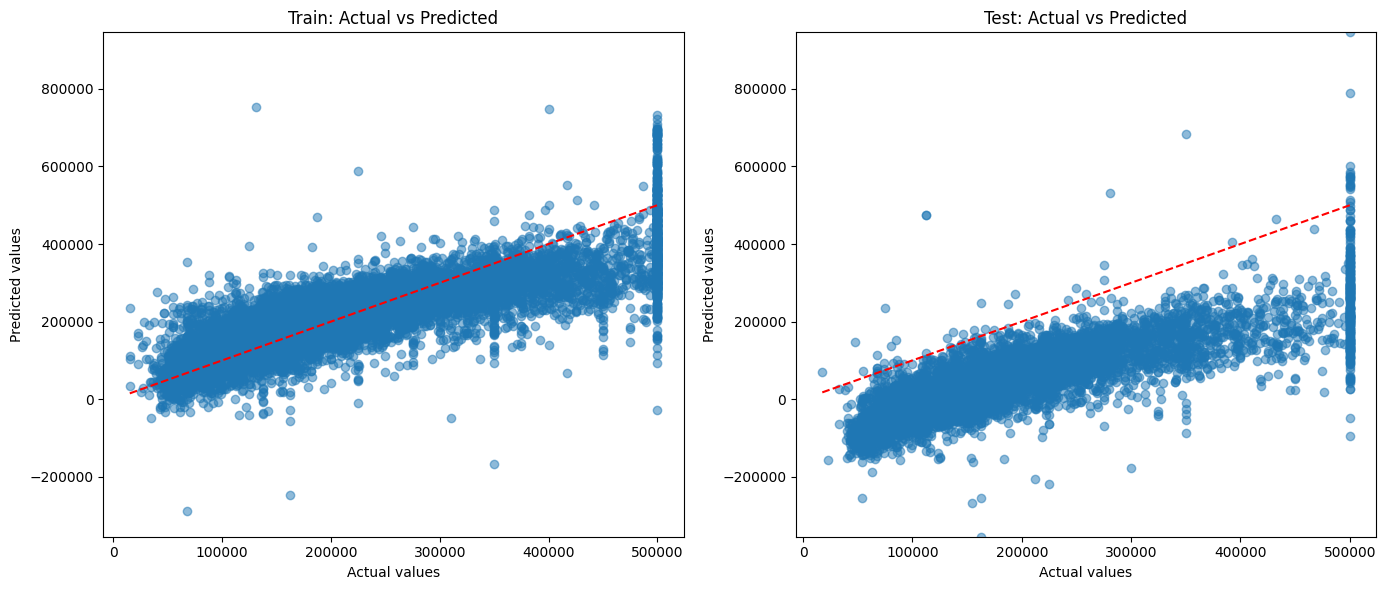

In [ ]:
import matplotlib.pyplot as plt

y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

plt.figure(figsize=(14, 6))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title('Train: Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

y_min = min(y_train.min(), y_test.min(), y_train_pred.min(), y_test_pred.min())
y_max = max(y_train.max(), y_test.max(), y_train_pred.max(), y_test_pred.max())

plt.ylim(y_min, y_max)


# Testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Test: Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

y_min = min(y_train.min(), y_test.min(), y_train_pred.min(), y_test_pred.min())
y_max = max(y_train.max(), y_test.max(), y_train_pred.max(), y_test_pred.max())

plt.ylim(y_min, y_max) 


plt.tight_layout()
plt.show()
